오피넷 => 싼 주유소 찾기 => 지역별 <br>
구를 바꿔도 url사이트가 안바뀜

- 서울시 고정
- 서울시의 구를 하나 선택
- 하단에 엑셀 저장 선택 후 파일 다운로드

# Selenium
- 웹 브라우저 자동화 도구
- 파이썬 코드를 이용해서 웹 브라우저를 제어
- 웹 페이지 열기, 텍스트 입력, 클릭
- 웹 사이틑 테스팅 
- 데이터 수집

# 주유소 가격 데이터 분석 프로젝트

## 1. 프로젝트 Overview 
- 데이터 분석 준비 
- 데이터 수집 (웹크롤링)
- 데이터 전처리 
- 데이터 분석
- 데이터 분석 결과

## 2. 데이터 확보하기 위한 작업 
- https://www.opinet.co.kr/searRgSelect.do
- 웹 페이지 구조 확인
- 목표 데이터
    - 엑셀 데이터
        - 브랜드
        - 셀프 주유 여부
        - 주소
        - 가격 

## 3. 데이터 수집 
- selenium 
- https://selenium-python.readthedocs.io/getting-started.html

### 3-1. 필요한 도구 불러오기

In [1]:
# !conda install -y selenium
# !pip install selenium

In [ ]:
# 필요한 도구 꺼내놓기 
import time
# 데이터 분석 도구
import pandas as pd 
import numpy as np

# 데이터 시각화 도구
import matplotlib.pyplot as plt 
import seaborn as sns 
import koreanize_matplotlib
%matplotlib inline 
# plt/sns이 주피터 노트북 안에서 그림
%config InlineBackend.figure_format = 'retina' 
# 그래픽화질 

# 데이터 수집 도구
from selenium import webdriver
from selenium.webdriver.common.by import By

# 기타 도구
# !conda install -y glob
# !pip install glob
from glob import glob

### 3-2. 셀레니움으로 웹페이지 접근하기

In [ ]:
# 1. 웹페이지 접속
# 2. 지역 선택 (고정)
# 3. 지역 => 구 하나 선택 
# 4. 지역, 구에 해당하는 엑셀 파일 다운로드
# 5. 그 지역 모든 구 반복

In [7]:
# 1 

url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome()
driver.get(url)

In [8]:
# 브라우저 크기 최대
driver.maximize_window()

In [10]:
# 지역 : 시/도
sido_list_raw = driver.find_element(By.ID, 'SIDO_NM0')
sido_list_raw.text

'            시/도\n            \n             \n             \n              서울\n             \n            \n             \n              부산\n             \n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [ ]:
# 시 단위 리스트 생성
sido_list = sido_list_raw.find_elements(By.TAG_NAME, 'option')
sido_list

[<selenium.webdriver.remote.webelement.WebElement (session="18856ef18f251ae33a0f83556b662124", element="f.C72FA551F9E0EFFA8AAA5A7FEC7C3AAC.d.74E2EEF60BC7E6BEB1F7325E32508486.e.73")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18856ef18f251ae33a0f83556b662124", element="f.C72FA551F9E0EFFA8AAA5A7FEC7C3AAC.d.74E2EEF60BC7E6BEB1F7325E32508486.e.75")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18856ef18f251ae33a0f83556b662124", element="f.C72FA551F9E0EFFA8AAA5A7FEC7C3AAC.d.74E2EEF60BC7E6BEB1F7325E32508486.e.77")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18856ef18f251ae33a0f83556b662124", element="f.C72FA551F9E0EFFA8AAA5A7FEC7C3AAC.d.74E2EEF60BC7E6BEB1F7325E32508486.e.79")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18856ef18f251ae33a0f83556b662124", element="f.C72FA551F9E0EFFA8AAA5A7FEC7C3AAC.d.74E2EEF60BC7E6BEB1F7325E32508486.e.81")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18856ef18f251ae33a0f83556

In [12]:
sido_list[2].text  

'부산'

In [13]:
# option태그가 가진 value 이름의 속성값 데이터 추출
sido_list[2].get_attribute('value')

'부산광역시'

In [14]:
# 시/도 리스트 데이터로 저장하기 
sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute('value'))

sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [15]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [23]:
sido_names[1]

'부산광역시'

In [25]:
sido_list_raw.send_keys(sido_names[1])

### 위 코드 정리

In [26]:
#  데이터 리스트 확보
# 지역 : 시/도
sido_list_raw = driver.find_element(By.ID, 'SIDO_NM0')

# 시 단위 리스트 생성성
sido_list = sido_list_raw.find_elements(By.TAG_NAME, 'option')

# 시/도 리스트 데이터로 저장하기 
sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute('value'))


sido_names = sido_names[1:]
sido_list_raw.send_keys(sido_names[1])

# 구 단위 데이터 리스트로 저장 

In [27]:
gu_list_raw = driver.find_element(By.ID , 'SIGUNGU_NM0') # 부모태그 
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option') # 자식태그

gu_names = []
for option in gu_list:
    gu_names.append(option.get_attribute('value'))

gu_names = gu_names[1:]

gu_names

['강서구',
 '금정구',
 '기장군',
 '남구',
 '동구',
 '동래구',
 '부산진구',
 '북구',
 '사상구',
 '사하구',
 '서구',
 '수영구',
 '연제구',
 '영도구',
 '중구',
 '해운대구']

# 엑셀 파일 다운로드 
#### 전체 구에 반속해서 각 구에 해당하는 엑셀 다운로드

In [30]:
# driver.find_element(By.ID, 'glopopd_excel') 아이디 가 없어진거같음
element_get_excel = driver.find_element(By.CLASS_NAME, "btn_type6_ex_save")
element_get_excel.click()

# 모든 구에 반복해서 주유소 정보 엑셀 파일 다운로드

In [ ]:
# 모든 구를 반복
for gu in gu_names:
    # try ~ except : 웹 크롤링 시 예상하지 못한 오류 대비비
    try:
        # 구 선택
        element = driver.find_element(By.ID , 'SIGUNGU_NM0')
        # 순서대로 구 정보 입력
        element.send_keys(gu)
        time.sleep(5)

        # 그 구에 해당하는 엑셀 데이터를 다운
        element_get_excel = driver.find_element(By.CLASS_NAME, "btn_type6_ex_save")
        element_get_excel.click()
        time.sleep(5)

        print(f'{gu} 엑셀 데이터를 다운 받았습니다!')
    
    except:
        print(f'{gu} 엑셀 데이터를 다운 받지 못했습니다')
        continue

강서구 엑셀 데이터를 다운 받았습니다!
금정구 엑셀 데이터를 다운 받았습니다!
기장군 엑셀 데이터를 다운 받았습니다!
남구 엑셀 데이터를 다운 받았습니다!
동구 엑셀 데이터를 다운 받았습니다!
동래구 엑셀 데이터를 다운 받았습니다!
부산진구 엑셀 데이터를 다운 받았습니다!
북구 엑셀 데이터를 다운 받았습니다!
사상구 엑셀 데이터를 다운 받았습니다!
사하구 엑셀 데이터를 다운 받았습니다!
서구 엑셀 데이터를 다운 받았습니다!
수영구 엑셀 데이터를 다운 받았습니다!
연제구 엑셀 데이터를 다운 받았습니다!
영도구 엑셀 데이터를 다운 받았습니다!
중구 엑셀 데이터를 다운 받았습니다!
해운대구 엑셀 데이터를 다운 받았습니다!


In [32]:
# 작업이 끝나면 드라이버 꼭 종료!
driver.quit()

# 데이터 정리하기

### 4-1. 여러 개의 엑셀 파일 하나로 합치기!
- glob 
- 특정 패턴과 일치하는 파일명을 리스트로 반환

In [34]:
stations_files = glob('.\Busan_Gas_Data\*.xls')
len(stations_files) , stations_files[:5]

(17,
 ['.\\Busan_Gas_Data\\지역_위치별(주유소) (1).xls',
  '.\\Busan_Gas_Data\\지역_위치별(주유소) (10).xls',
  '.\\Busan_Gas_Data\\지역_위치별(주유소) (11).xls',
  '.\\Busan_Gas_Data\\지역_위치별(주유소) (12).xls',
  '.\\Busan_Gas_Data\\지역_위치별(주유소) (13).xls'])

In [ ]:
# !conda install -y xlrd
# !pip install xlrd

Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\Users\YUN\miniconda3\envs\ds_st

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlrd-2.0.1                 |     pyhd3eb1b0_1          97 KB
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  xlrd               pkgs/main/noarch::xlrd-2.0.1-pyhd3eb1b0_1 



xlrd-2.0.1           | 97 KB     |            |   0% 
xlrd-2.0.1           | 97 KB     | #6         |  17% 
xlrd-2.0.1           | 97 KB     | ########## | 100% 
xlrd-2.0.1           | 97 KB     | ########## | 100% 
                                                     
 done
Preparing transaction: done
Verifying transaction: done
Execu

In [35]:
pd.read_excel(stations_files[0])

,지역_위치별(주유소),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위 : 원/리터)
1,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
2,부산광역시,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),NH-OIL,051-973-8141,N,-,1574,1469,-
3,부산광역시,내트럭(주) 부산신항남컨사업소,부산 강서구 신항남로 507,SK에너지,070-4454-9235,N,-,1578,1559,-
4,부산광역시,은마석유(주)신호주유소,부산 강서구 낙동남로 514,HD현대오일뱅크,051-971-6331,Y,-,1579,1499,1350
5,부산광역시,서강주유소,부산 강서구 낙동북로 42 (강동동),SK에너지,051-971-8484,Y,-,1585,1453,-
6,부산광역시,우리2주유소,부산 강서구 낙동북로 142,알뜰주유소,051-971-5585,Y,-,1585,1453,-
7,부산광역시,공항대로주유소,부산 강서구 공항로 1217 (대저1동),알뜰주유소,051-973-8122,Y,-,1585,1463,1250
8,부산광역시,동방석유㈜직영 대저주유소,부산 강서구 낙동북로 209 (대저1동),SK에너지,051-971-2135,Y,-,1585,1453,-
9,부산광역시,은마석유 경기장주유소,부산 강서구 낙동북로 364,GS칼텍스,051-971-7956,Y,1888,1585,1459,1300


In [36]:
tmp = pd.read_excel(stations_files[0], header=2)
tmp.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),NH-OIL,051-973-8141,N,-,1574,1469,-
1,부산광역시,내트럭(주) 부산신항남컨사업소,부산 강서구 신항남로 507,SK에너지,070-4454-9235,N,-,1578,1559,-
2,부산광역시,은마석유(주)신호주유소,부산 강서구 낙동남로 514,HD현대오일뱅크,051-971-6331,Y,-,1579,1499,1350
3,부산광역시,서강주유소,부산 강서구 낙동북로 42 (강동동),SK에너지,051-971-8484,Y,-,1585,1453,-
4,부산광역시,우리2주유소,부산 강서구 낙동북로 142,알뜰주유소,051-971-5585,Y,-,1585,1453,-


In [37]:
tmp_raw = []

for file_name in stations_files:
    # 엑셀 파일을 판다스 데이터 프레임 저장
    tmp = pd.read_excel(file_name, header=2)
    # 데이터 프레임을 리스틍 안에 저장
    tmp_raw.append(tmp)

In [38]:
len(tmp_raw)

17

In [39]:
tmp_raw[8].tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
11,부산광역시,금정산주유소,부산 금정구 금샘로 399 (구서동),SK에너지,051-517-5472,N,1927,1657,1537,1400
12,부산광역시,남산주유소,부산 금정구 중앙대로 2044 (남산동),S-OIL,051-517-5149,Y,1968,1698,1598,-
13,부산광역시,식물원주유소,부산 금정구 금샘로 21 (장전동),S-OIL,051-515-5189,N,-,1725,1585,1450
14,부산광역시,새석대주유소,부산 금정구 반송로 463 (금사동),S-OIL,051-527-5142,N,1897,1737,1617,-
15,부산광역시,동양주유소,부산 금정구 반송로 391 (서동),HD현대오일뱅크,051-523-1214,Y,-,1737,1617,-


In [41]:
# 리스트 안에 데이터 프레임을 컬럼이 같은 기준에서 합친다 
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),NH-OIL,051-973-8141,N,-,1574,1469,-
1,부산광역시,내트럭(주) 부산신항남컨사업소,부산 강서구 신항남로 507,SK에너지,070-4454-9235,N,-,1578,1559,-
2,부산광역시,은마석유(주)신호주유소,부산 강서구 낙동남로 514,HD현대오일뱅크,051-971-6331,Y,-,1579,1499,1350
3,부산광역시,서강주유소,부산 강서구 낙동북로 42 (강동동),SK에너지,051-971-8484,Y,-,1585,1453,-
4,부산광역시,우리2주유소,부산 강서구 낙동북로 142,알뜰주유소,051-971-5585,Y,-,1585,1453,-
...,...,...,...,...,...,...,...,...,...,...
24,부산광역시,SK에너지(주) 마리나주유소,부산 해운대구 해운대로 345 (우동),SK에너지,051-747-5181,Y,1849,1652,1539,-
25,부산광역시,SK에너지(주) 돌고래주유소,부산 해운대구 해운대로573번길 16,SK에너지,051-747-5190,N,1849,1699,1539,-
26,부산광역시,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),SK에너지,051-747-5182,Y,1849,1718,1568,-
27,부산광역시,동양가스(주) 명품주유소반송점,부산 해운대구 반송로 781 (석대동),HD현대오일뱅크,051-522-2590,Y,-,1829,1715,-


In [ ]:
stations_raw.info()
# Index: 418 entries, 0 to 28
# => 리스트 하나가 28개 였나?

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 0 to 28
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      371 non-null    object
 1   상호      371 non-null    object
 2   주소      371 non-null    object
 3   상표      371 non-null    object
 4   전화번호    371 non-null    object
 5   셀프여부    371 non-null    object
 6   고급휘발유   371 non-null    object
 7   휘발유     371 non-null    object
 8   경유      371 non-null    object
 9   실내등유    371 non-null    object
dtypes: object(10)
memory usage: 31.9+ KB


In [43]:
stations_raw.head(1)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),NH-OIL,051-973-8141,N,-,1574,1469,-


In [44]:
data = {
    '상호': stations_raw['상호'],
    '주소': stations_raw['주소'],
    '휘발유': stations_raw['휘발유'],
    '경유': stations_raw['경유'],
    '셀프': stations_raw['셀프여부'],
    '상표': stations_raw['상표']
} 

In [45]:
# 고급휘발유, 실내 등유가 objecet (문자) => 숫자로 수정

# raw 데이터에서 의미 있는 데이터만 뽑아서 사용

stations = pd.DataFrame(data)
stations.tail()

,상호,주소,휘발유,경유,셀프,상표
24,SK에너지(주) 마리나주유소,부산 해운대구 해운대로 345 (우동),1652,1539,Y,SK에너지
25,SK에너지(주) 돌고래주유소,부산 해운대구 해운대로573번길 16,1699,1539,N,SK에너지
26,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),1718,1568,Y,SK에너지
27,동양가스(주) 명품주유소반송점,부산 해운대구 반송로 781 (석대동),1829,1715,Y,HD현대오일뱅크
28,에스씨(주) 마리나타운주유소,부산 해운대구 해운대해변로 44 (우동),1879,1765,N,GS칼텍스


In [46]:
#  구 컬럼 추가 
text = '부산광역시 강서구 낙동남로 448 (녹산동)'
text.split()[1]

'강서구'

In [47]:
# 구 데이터를 리스트 형태로 저장 
station_gu_list = []

for address in stations['주소']:
    gu = address.split()[1]
    station_gu_list.append(gu)


In [48]:
# 데이터 검증 작업 수가 같으면 컬럼 추가 가능능
len(station_gu_list) , len(stations)

(371, 371)

In [49]:
# 구 컬럼 추가
stations['구'] = station_gu_list

In [50]:
stations.head()

,상호,주소,휘발유,경유,셀프,상표,구
0,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),1574,1469,N,NH-OIL,강서구
1,내트럭(주) 부산신항남컨사업소,부산 강서구 신항남로 507,1578,1559,N,SK에너지,강서구
2,은마석유(주)신호주유소,부산 강서구 낙동남로 514,1579,1499,Y,HD현대오일뱅크,강서구
3,서강주유소,부산 강서구 낙동북로 42 (강동동),1585,1453,Y,SK에너지,강서구
4,우리2주유소,부산 강서구 낙동북로 142,1585,1453,Y,알뜰주유소,강서구


In [53]:
stations['휘발유'].replace('-',0).astype('int')

0     1574
1     1578
2     1579
3     1585
4     1585
      ... 
24    1652
25    1699
26    1718
27    1829
28    1879
Name: 휘발유, Length: 371, dtype: int32

In [55]:
stations[stations['휘발유'] != '-']

,상호,주소,휘발유,경유,셀프,상표,구
0,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),1574,1469,N,NH-OIL,강서구
1,내트럭(주) 부산신항남컨사업소,부산 강서구 신항남로 507,1578,1559,N,SK에너지,강서구
2,은마석유(주)신호주유소,부산 강서구 낙동남로 514,1579,1499,Y,HD현대오일뱅크,강서구
3,서강주유소,부산 강서구 낙동북로 42 (강동동),1585,1453,Y,SK에너지,강서구
4,우리2주유소,부산 강서구 낙동북로 142,1585,1453,Y,알뜰주유소,강서구
...,...,...,...,...,...,...,...
24,SK에너지(주) 마리나주유소,부산 해운대구 해운대로 345 (우동),1652,1539,Y,SK에너지,해운대구
25,SK에너지(주) 돌고래주유소,부산 해운대구 해운대로573번길 16,1699,1539,N,SK에너지,해운대구
26,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),1718,1568,Y,SK에너지,해운대구
27,동양가스(주) 명품주유소반송점,부산 해운대구 반송로 781 (석대동),1829,1715,Y,HD현대오일뱅크,해운대구


In [ ]:
# 만약 휘발유에 가격정보가 없는 " - " 가 있고 object 이라면 !
# stations[stations['휘발유'] == '-']  # 휘발유가 - 인 값만 보여줌 
# 여기서 확인했는데 휘발유랑 경유 데이터 둘다 - 되어 있으면 전처리 작업
# stations = stations[stations['휘발유'] != '-']
# stations = stations[stations['경유'] != '-']


In [57]:
stations[stations['경유'] != '-']

,상호,주소,휘발유,경유,셀프,상표,구
0,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),1574,1469,N,NH-OIL,강서구
1,내트럭(주) 부산신항남컨사업소,부산 강서구 신항남로 507,1578,1559,N,SK에너지,강서구
2,은마석유(주)신호주유소,부산 강서구 낙동남로 514,1579,1499,Y,HD현대오일뱅크,강서구
3,서강주유소,부산 강서구 낙동북로 42 (강동동),1585,1453,Y,SK에너지,강서구
4,우리2주유소,부산 강서구 낙동북로 142,1585,1453,Y,알뜰주유소,강서구
...,...,...,...,...,...,...,...
24,SK에너지(주) 마리나주유소,부산 해운대구 해운대로 345 (우동),1652,1539,Y,SK에너지,해운대구
25,SK에너지(주) 돌고래주유소,부산 해운대구 해운대로573번길 16,1699,1539,N,SK에너지,해운대구
26,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),1718,1568,Y,SK에너지,해운대구
27,동양가스(주) 명품주유소반송점,부산 해운대구 반송로 781 (석대동),1829,1715,Y,HD현대오일뱅크,해운대구


In [58]:
stations = stations[stations['휘발유'] != '-']
stations = stations[stations['경유'] != '-']

In [59]:
stations['휘발유'] = stations['휘발유'].astype('float')
stations['경유'] = stations['경유'].astype('float')

In [60]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 28
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      366 non-null    object 
 1   주소      366 non-null    object 
 2   휘발유     366 non-null    float64
 3   경유      366 non-null    float64
 4   셀프      366 non-null    object 
 5   상표      366 non-null    object 
 6   구       366 non-null    object 
dtypes: float64(2), object(5)
memory usage: 22.9+ KB


In [61]:
# 인덱스 재졍렬
stations.tail()

,상호,주소,휘발유,경유,셀프,상표,구
24,SK에너지(주) 마리나주유소,부산 해운대구 해운대로 345 (우동),1652.0,1539.0,Y,SK에너지,해운대구
25,SK에너지(주) 돌고래주유소,부산 해운대구 해운대로573번길 16,1699.0,1539.0,N,SK에너지,해운대구
26,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),1718.0,1568.0,Y,SK에너지,해운대구
27,동양가스(주) 명품주유소반송점,부산 해운대구 반송로 781 (석대동),1829.0,1715.0,Y,HD현대오일뱅크,해운대구
28,에스씨(주) 마리나타운주유소,부산 해운대구 해운대해변로 44 (우동),1879.0,1765.0,N,GS칼텍스,해운대구


In [62]:
stations.reset_index(drop=True,inplace=True)

In [63]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      366 non-null    object 
 1   주소      366 non-null    object 
 2   휘발유     366 non-null    float64
 3   경유      366 non-null    float64
 4   셀프      366 non-null    object 
 5   상표      366 non-null    object 
 6   구       366 non-null    object 
dtypes: float64(2), object(5)
memory usage: 20.1+ KB


### 5-1 : 기본 그래프 사용 시각화
- 박스플롯
- 가격에 대한 비교
- 가겨 분포에 대한 비교

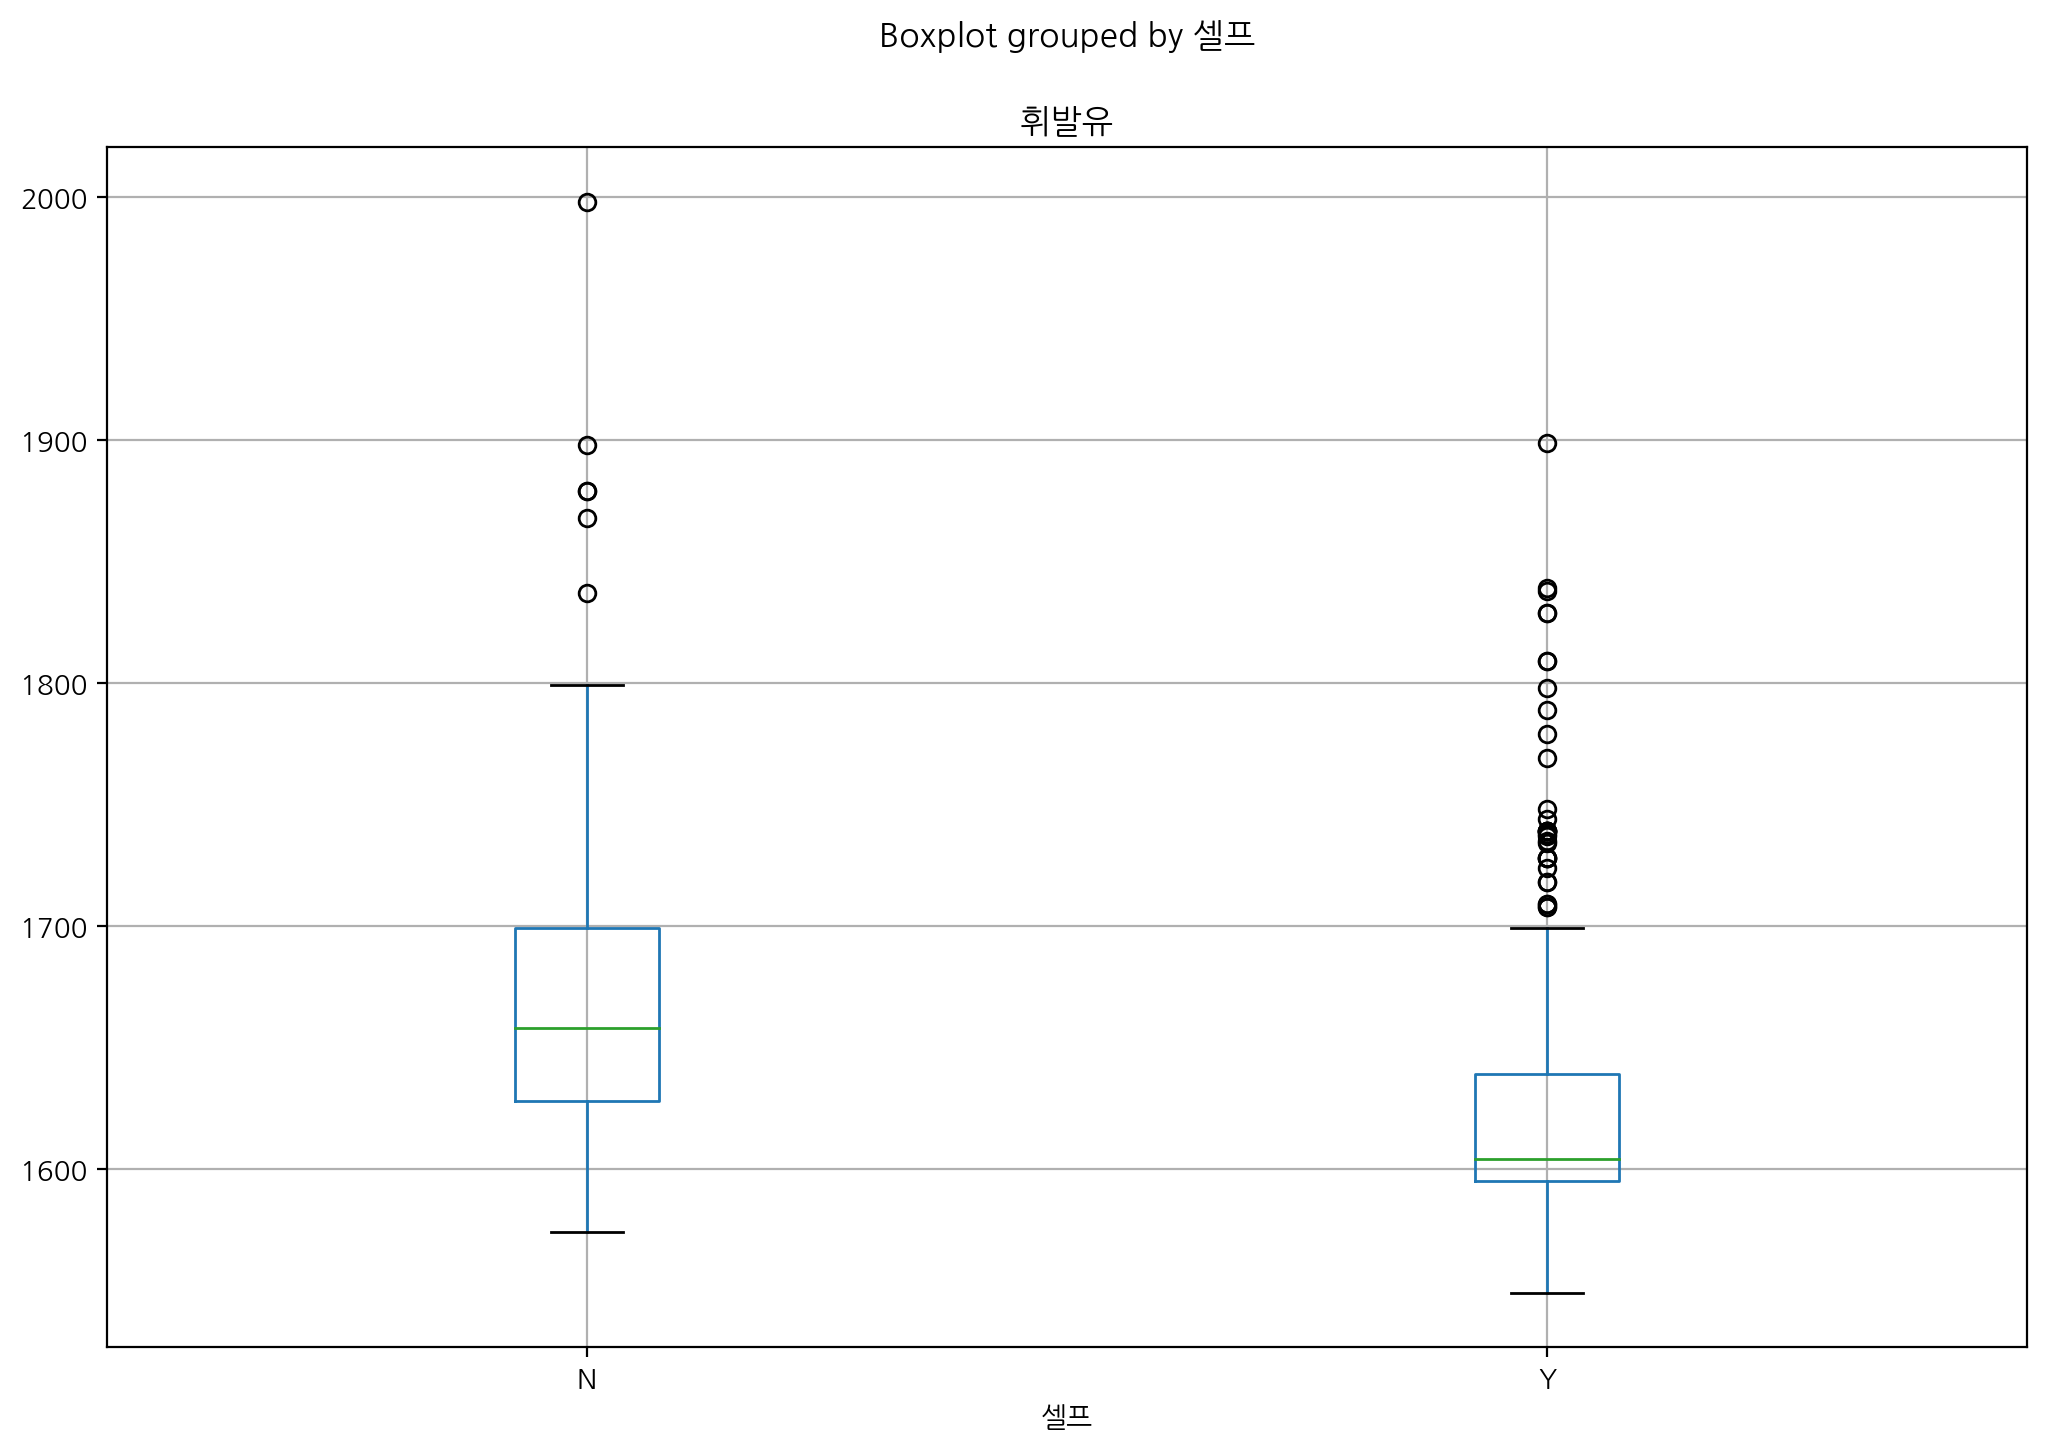

In [64]:
# boxplot ( pandas )

stations.boxplot(column='휘발유',by='셀프',figsize=(12,8));

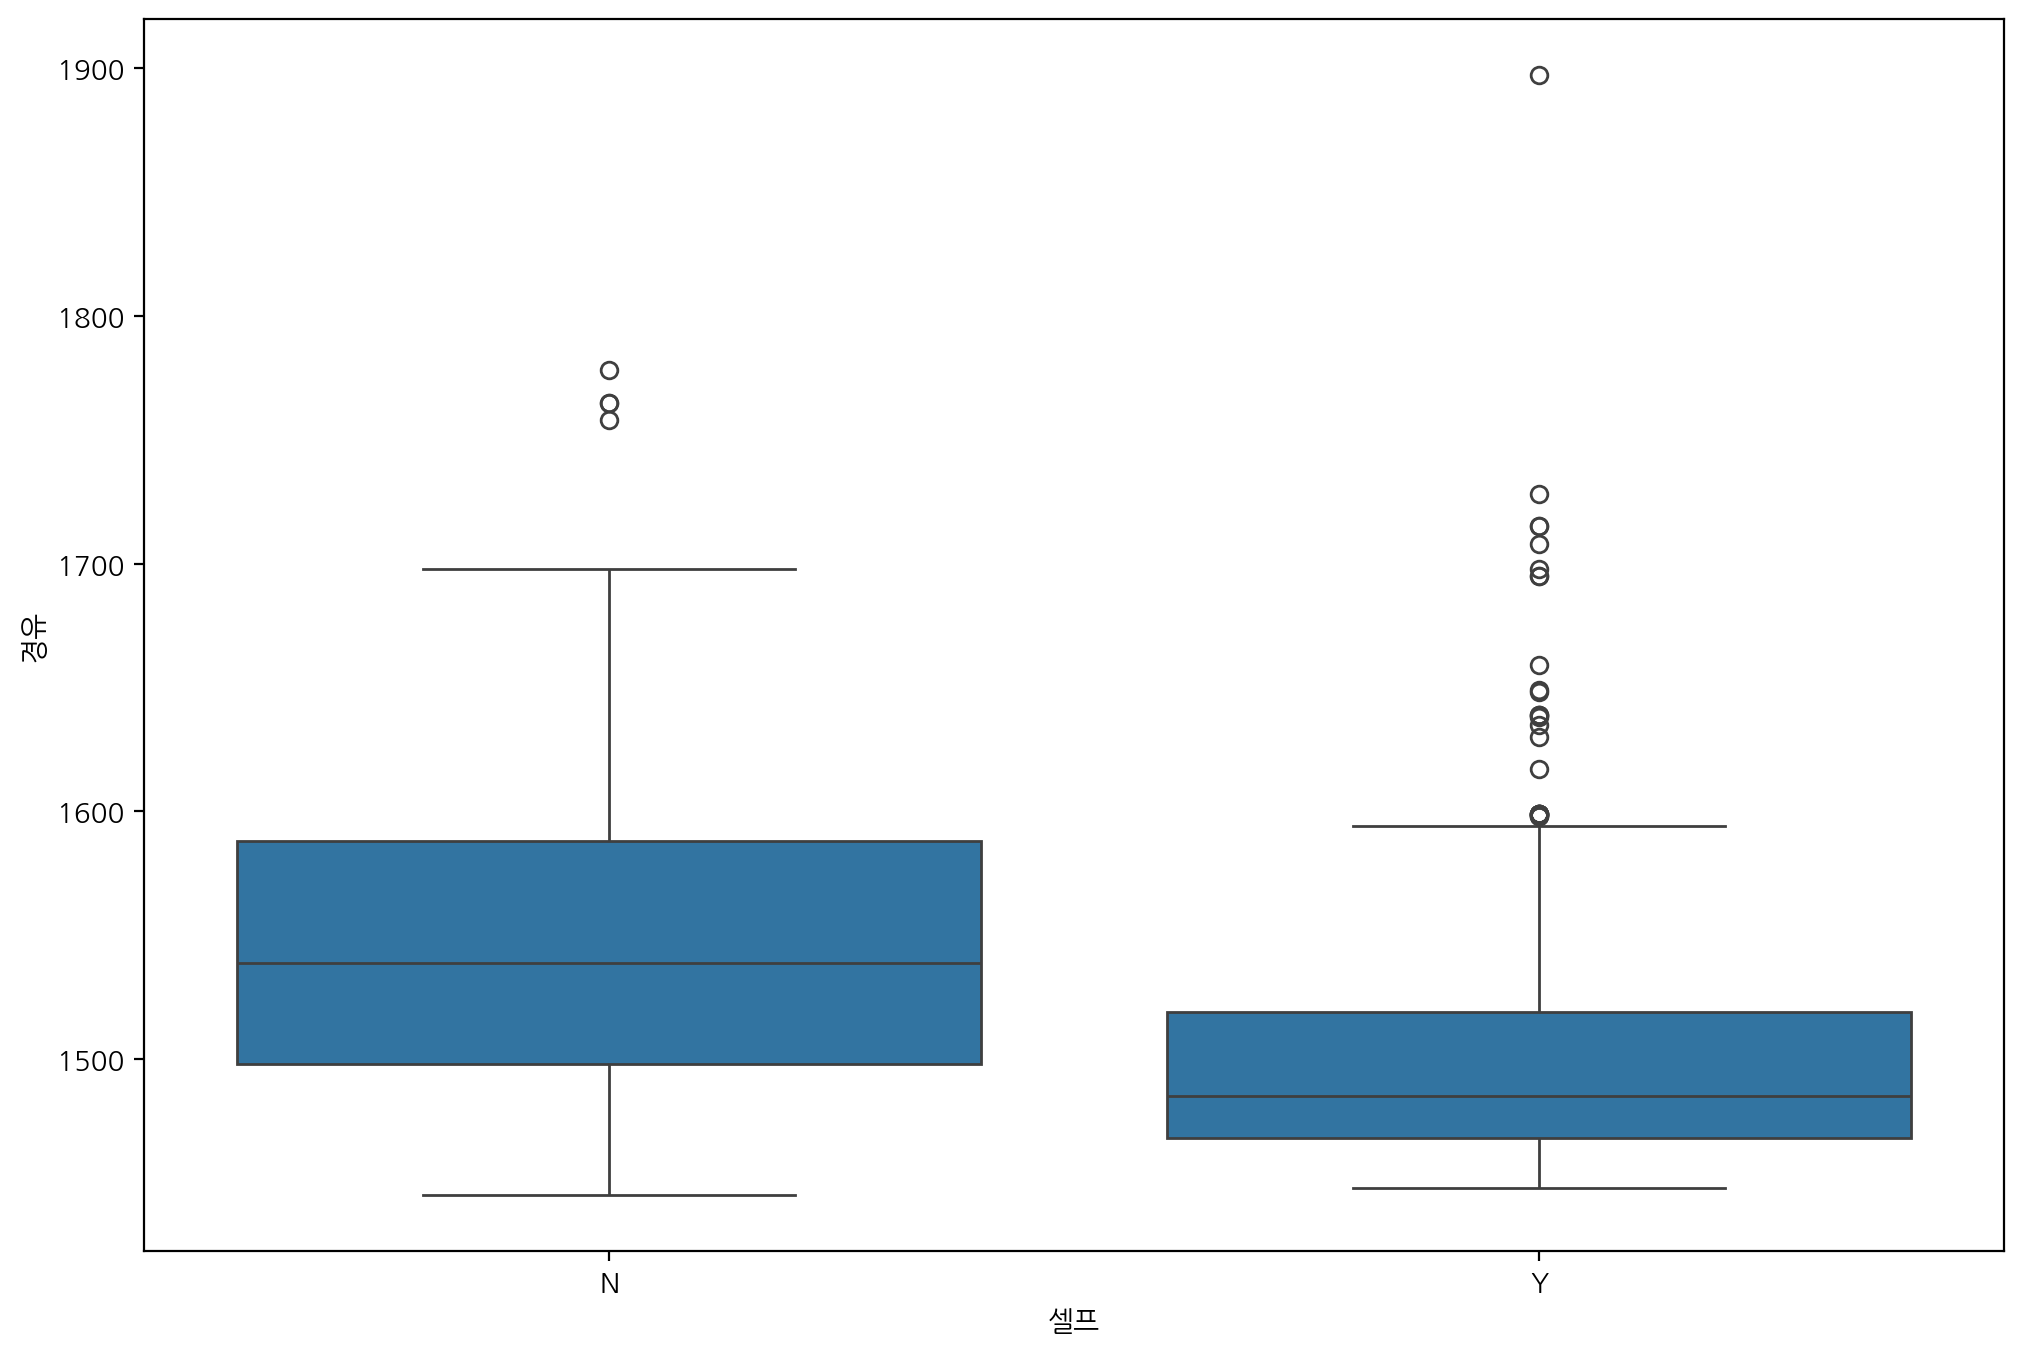

In [65]:
# boxplot ( seaborn )

fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='셀프',y='경유',data=stations)

plt.show()

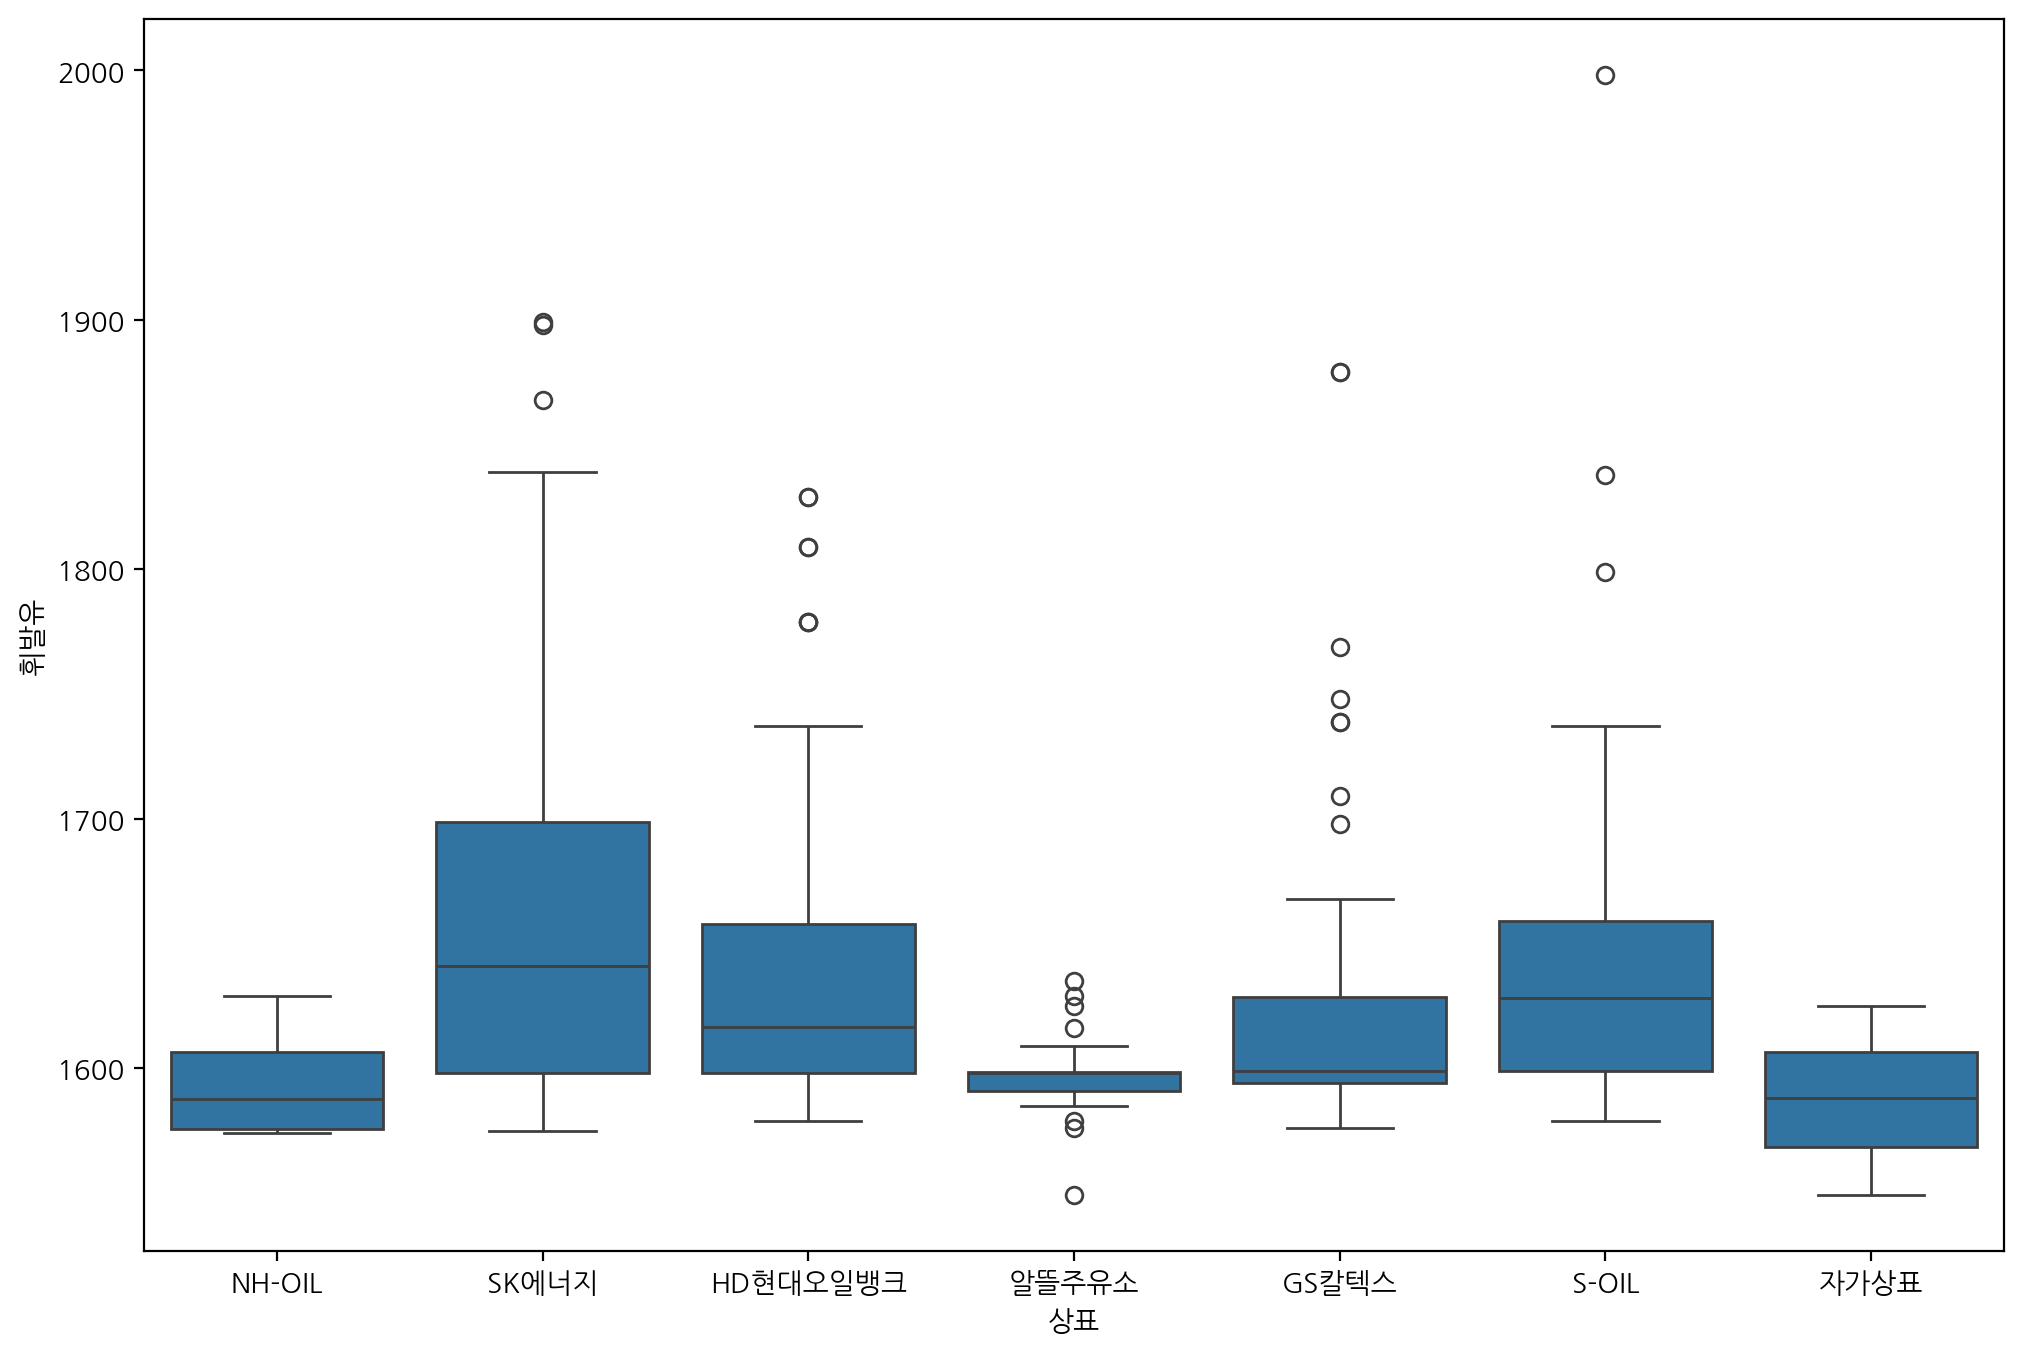

In [66]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='상표',y='휘발유',data=stations)

plt.show()

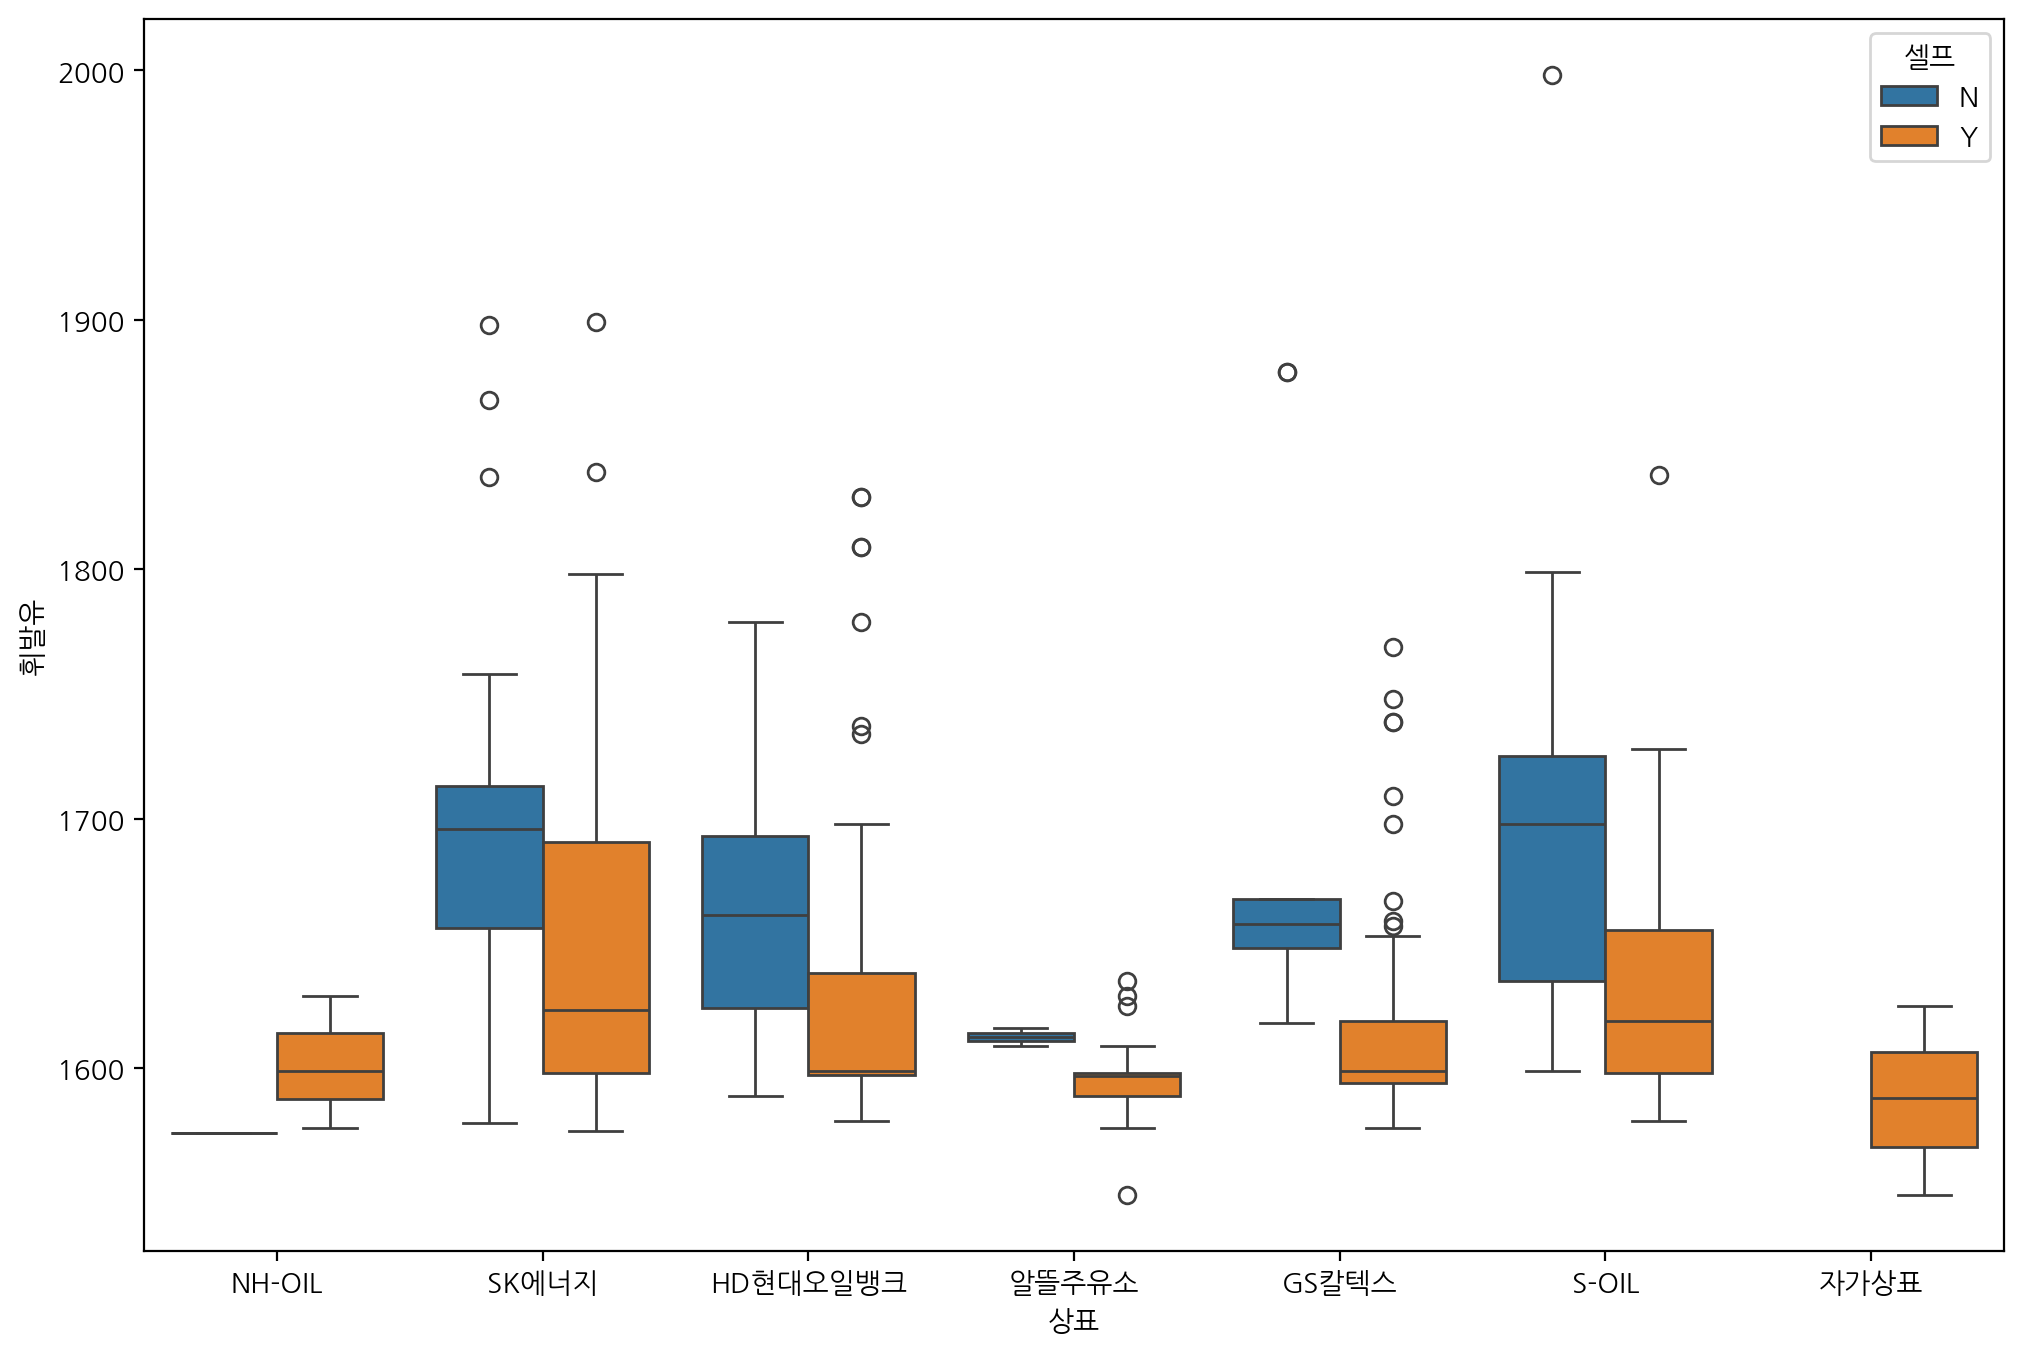

In [67]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='상표',y='휘발유',hue='셀프', data=stations)

plt.show()

# 지도 시각화

In [68]:
import folium

In [69]:
stations

,상호,주소,휘발유,경유,셀프,상표,구
0,부산축산업협동조합 농협주유소,부산광역시 강서구 낙동남로 448 (녹산동),1574.0,1469.0,N,NH-OIL,강서구
1,내트럭(주) 부산신항남컨사업소,부산 강서구 신항남로 507,1578.0,1559.0,N,SK에너지,강서구
2,은마석유(주)신호주유소,부산 강서구 낙동남로 514,1579.0,1499.0,Y,HD현대오일뱅크,강서구
3,서강주유소,부산 강서구 낙동북로 42 (강동동),1585.0,1453.0,Y,SK에너지,강서구
4,우리2주유소,부산 강서구 낙동북로 142,1585.0,1453.0,Y,알뜰주유소,강서구
...,...,...,...,...,...,...,...
361,SK에너지(주) 마리나주유소,부산 해운대구 해운대로 345 (우동),1652.0,1539.0,Y,SK에너지,해운대구
362,SK에너지(주) 돌고래주유소,부산 해운대구 해운대로573번길 16,1699.0,1539.0,N,SK에너지,해운대구
363,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),1718.0,1568.0,Y,SK에너지,해운대구
364,동양가스(주) 명품주유소반송점,부산 해운대구 반송로 781 (석대동),1829.0,1715.0,Y,HD현대오일뱅크,해운대구


In [70]:
folium_for_gu_data = stations.pivot_table(index='구',values='경유',aggfunc=np.mean)
folium_for_gu_data

,경유
구,
강서구,1502.941176
금정구,1520.187500
기장군,1490.309524
남구,1518.629630
동구,1520.777778
동래구,1494.142857
부산진구,1541.772727
북구,1517.562500
사상구,1501.100000


In [ ]:
'''
import json, requests
from topojson import Topology

URL = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-municipalities-2018-topo-simple.json"
BUSAN = {"강서구","금정구","기장군","남구","동구","동래구","부산진구","북구",
         "사상구","사하구","서구","수영구","연제구","영도구","중구","해운대구"}

# 1) TopoJSON 로드
topo = requests.get(URL).json()

# 2) 객체 이름 자동 탐지
obj_keys = list(topo.get("objects", {}).keys())
if not obj_keys:
    raise RuntimeError("TopoJSON에 objects가 없습니다.")
obj_name = obj_keys[0]
print("사용 객체명:", obj_name)

# 3) TopoJSON -> GeoJSON FeatureCollection
fc = Topology(topo, object_name=obj_name).to_geojson()

# to_geojson()이 문자열을 반환하는 경우 대비
if isinstance(fc, str):
    fc = json.loads(fc)

# 4) 부산만 필터링 + 속성 정리
features = []
for feat in fc.get("features", []):
    props = feat.get("properties", {}) or {}
    name = props.get("name") or props.get("SIG_KOR_NM") or props.get("adm_nm")
    if name in BUSAN:
        features.append({
            "type": "Feature",
            "id": name,
            "properties": {
                "code": props.get("code") or props.get("SIG_CD") or "",
                "name": name,
                "name_eng": props.get("name_eng") or "",
                "base_year": "2018"
            },
            "geometry": feat.get("geometry")
        })

busan_geo = {"type": "FeatureCollection", "features": features}
print("선택된 구·군 수:", len(features))  # 16이어야 정상

# 5) 저장
with open("busan_gu.geojson", "w", encoding="utf-8") as f:
    json.dump(busan_geo, f, ensure_ascii=False)
print("생성 완료 → busan_gu.geojson")
'''

사용 객체명: skorea_municipalities_2018_geo
선택된 구·군 수: 38
생성 완료 → busan_gu.geojson


In [84]:
m = folium.Map(location=[35.18,129.06], zoom_start=11)

folium.Choropleth(
    geo_data= './Busan_Gas_Data/busan_gu.geojson',
    data = folium_for_gu_data,
    columns=[folium_for_gu_data.index,'경유'],
    key_on='feature.id', # 문법이라 생각

    fill_color='PuRd',
    legend_name='구별 경유 평균 가격'
).add_to(m)

m

# 구, 상표별 휘발유

In [105]:
folium_for_gu_data = stations.pivot_table(index='구',values='휘발유',aggfunc=np.mean)
folium_for_gu_data

,휘발유
구,
강서구,1629.411765
금정구,1638.125000
기장군,1619.785714
남구,1616.259259
동구,1648.000000
동래구,1637.285714
부산진구,1662.818182
북구,1652.875000
사상구,1628.125000


In [106]:
import json, folium
from folium.features import DivIcon

m = folium.Map(location=[35.18,129.06], zoom_start=11)

folium.Choropleth(
    geo_data='./Busan_Gas_Data/busan_gu.geojson',
    data=folium_for_gu_data,
    columns=[folium_for_gu_data.index, '휘발유'],
    key_on='feature.id',
    fill_color='PuRd',
    legend_name='구별 경유 평균 가격'
).add_to(m)

#  구별 최고가 상표 뽑기 (휘발유 기준 예시)
tops = (stations.groupby(['구','상표'])['휘발유']
        .mean().reset_index())
tops = tops.loc[tops.groupby('구')['휘발유'].idxmax()]\
           .set_index('구')  # index: 구, cols: 상표, 휘발유



def centroid_simple(geom):
    rings = [r for poly in geom['coordinates'] for r in poly]

    xs, ys, n = 0.0, 0.0, 0
    for ring in rings:
        for x,y in ring:
            xs += x; ys += y; n += 1        # 위도, 경도를 누적해서 평균값 
    return (ys/n, xs/n)  # folium은 (lat, lon)  위도 먼저 반환


#  GeoJSON에서 구 중심(평균 좌표) 계산해서 라벨 추가
with open('./Busan_Gas_Data/busan_gu.geojson','r',encoding='utf-8') as f:
    gj = json.load(f)

for feat in gj['features']:
    gu = feat.get('id')

    lat, lon = centroid_simple(feat['geometry'])
    brand = tops.loc[gu, '상표']; price = tops.loc[gu, '휘발유']
    folium.Marker(
        [lat, lon],
        icon=DivIcon(                                                       # Folium Marker에 전달할 아이콘 객체를 생성
            icon_size=(120,32), icon_anchor=(0,0),
            html=f'<div style="font-size:11px;font-weight:700;'             # 글자 크기 11px, 글자 두께 700
                 f'background:rgba(255,255,255,.8);padding:2px 6px;'        # 배경색은 반투명 흰색, 패딩은 위아래 2px 좌우 6px로 설정
                 f'border:1px solid #555;border-radius:6px;">'              # 테두리는 진회색 1px 실선, 모서리는 6px 둥글림
                 f'{gu}<br>{brand} / {price:,.0f}</div>'                    # 실제 표시할 내용
        )   
    ).add_to(m)

m